In [80]:
import georef2
import numpy as np
import pyexiv2
import os
import matplotlib.pyplot as plt

In [81]:
# populate map
ORIGIN_PATH = "DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143604_0001_D_Waypoint1.JPG"
IMG_DIR = "DJI_202508081433_021_PineIslandbog5H3m5x3photo"
LABEL_DIR = "output"
all_detections_coor = []

path_list = sorted(os.listdir("output"))
label_list = []
img_list = []

for i in range(len(path_list)): 
    if path_list[i][-3:] == 'txt':
        label_list.append(path_list[i])
    elif path_list[i][-3:] == 'JPG':
        img_list.append(path_list[i])
    else:
        pass

for i in range(len(label_list)):
    img_path = os.path.join(IMG_DIR, img_list[i])
    label_path = os.path.join(LABEL_DIR, label_list[i])
    mapped_list = georef2.georef(ORIGIN_PATH, img_path, label_path)
    all_detections_coor.extend(mapped_list)

pitch: -1.0471975511965976
altitude: 3.026
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.9859999999999998
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.987
yaw: 0.24085543677521742
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.991
yaw: 0.24609142453120036
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.989
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.998
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 3.014
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.989
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.999
yaw: 0.24783675378319484
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
alt

In [82]:
detection_coor = georef2.get_detections_coor("DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143611_0002_D_Waypoint2.JPG", "output/DJI_20250808143611_0002_D_Waypoint2.txt")
print(detection_coor)

pitch: -1.0471975511965976
altitude: 3.026
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
[[-2.78895164  4.10134514]
 [-3.05953749  3.6566843 ]
 [-2.87805439  4.64405495]
 ...
 [ 1.91073994  0.49592349]
 [ 1.93619726  0.44711924]
 [ 1.75631479  0.33577143]]


In [83]:
corners = georef2.get_image_corners(ORIGIN_PATH, "DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143611_0002_D_Waypoint2.JPG")
print(corners)

img width:  5280.0
img height:  3956.0
[[np.float64(-3.7013454588912813), np.float64(7.820136247540542)], [np.float64(3.261208792716473), np.float64(7.820136247540542)], [np.float64(1.6503046293940935), np.float64(3.1938884281687523)], [np.float64(-2.0904412955689016), np.float64(3.1938884281687523)]]


x_max: 3.3054982496233647
x_min: -3.363990244447583
y_max: 4.741401587653895
y_min: 0.1327700654973745
plot bound: 5.215541746419285


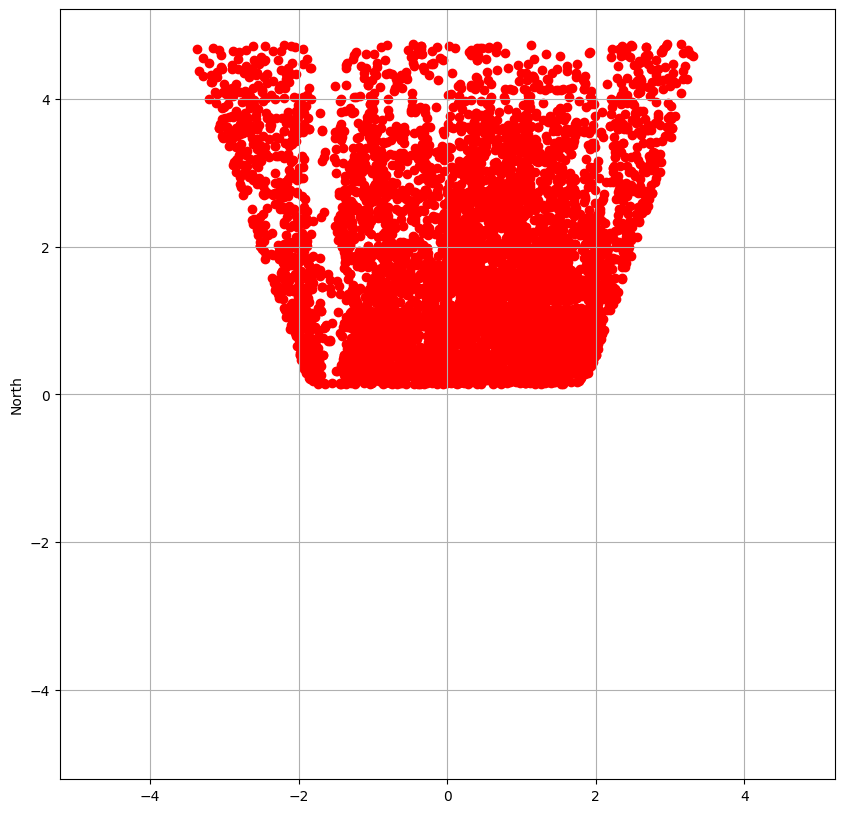

In [84]:
x_s = np.array([])
y_s = np.array([])
x_s = detection_coor[:, 0]
y_s = detection_coor[:, 1]

print('x_max:', np.max(x_s))
print('x_min:', np.min(x_s))

print('y_max:', np.max(y_s))
print('y_min:', np.min(y_s))

if np.max(x_s) <= -1*np.min(x_s):
    x_bound = -1*np.min(x_s)
else:
    x_bound = np.max(x_s)
if np.max(y_s) <= -1*np.min(y_s):
    y_bound = -1*np.min(y_s)
else:
    y_bound = np.max(y_s)

if x_bound < y_bound:
    bound = y_bound
else:
    bound = x_bound

bound = bound + bound*0.1
print("plot bound:", bound)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-bound, bound)
ax.set_ylim(-bound, bound)
plt.ylabel("North")
ax.grid(True)
ax.scatter(x_s, y_s, color='red', marker='o')
plt.show()


x_max: 6.292158283566668
x_min: -31.891164173498712
y_max: 133.07483254901518
y_min: 3.202057389697287
bound: 146.3823158039167


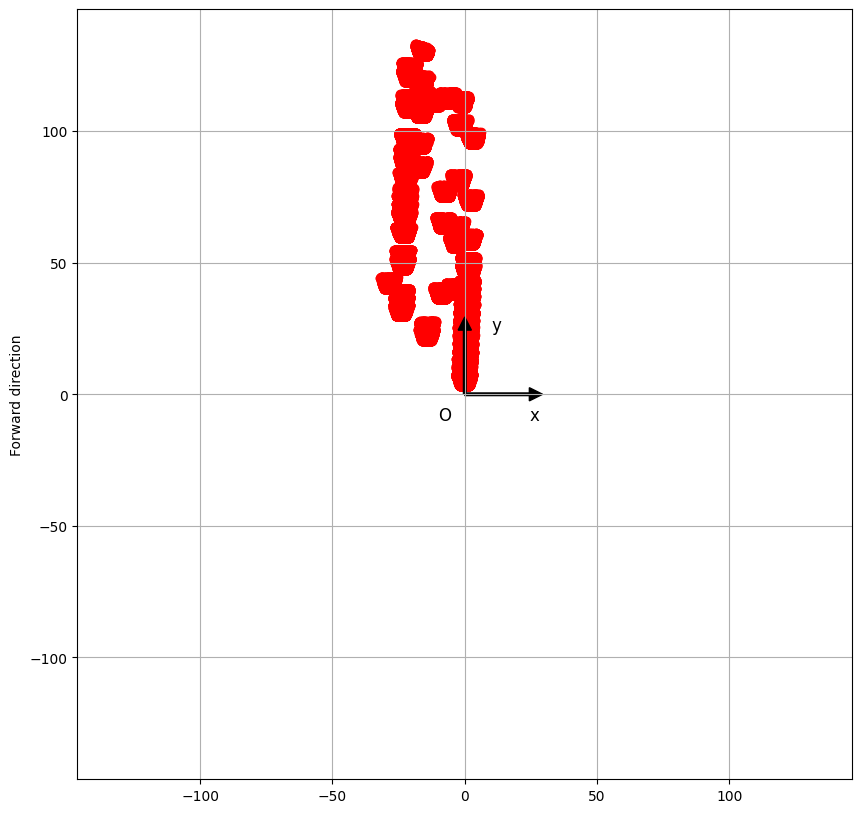

In [85]:
x_s = np.array([])
y_s = np.array([])


for i in range(len(all_detections_coor)):
    x_s = np.append(x_s, all_detections_coor[i][0])
    y_s = np.append(y_s, all_detections_coor[i][1])

print('x_max:', np.max(x_s))
print('x_min:', np.min(x_s))

print('y_max:', np.max(y_s))
print('y_min:', np.min(y_s))

if np.max(x_s) <= -1*np.min(x_s):
    x_bound = -1*np.min(x_s)
else:
    x_bound = np.max(x_s)
if np.max(y_s) <= -1*np.min(y_s):
    y_bound = -1*np.min(y_s)
else:
    y_bound = np.max(y_s)

if x_bound < y_bound:
    bound = y_bound
else:
    bound = x_bound

bound = bound + bound*0.1
print("bound:", bound)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-bound, bound)
ax.set_ylim(-bound, bound)
plt.ylabel("Forward direction")
ax.grid(True)

ax.scatter(x_s, y_s, color='red', marker='o')

# y-axis
ax.arrow(0, 0, 0, bound/6, width=1, head_width=5, head_length=5, fc='black', ec='black')
plt.text(10, bound/6, "y", color='black', fontsize='12')

# x-axis
ax.arrow(0, 0, bound/6, 0, width= 1, head_width=5, head_length=5, fc='black', ec='black')
plt.text(bound/6, -10, "x", color='black', fontsize='12')

plt.text(-10, -10, "O", color='black', fontsize=12)
plt.show()

In [86]:
import georef2
import numpy as np
import pyexiv2
import os
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box, Point

# with open("./all_detections.txt", "w") as f:
#     for coor in all_detections_coor:
#         to_write = str(coor[0]) + ", " + str(coor[1]) + "\n"
#         f.write(to_write)
#     f.close()


# setting up paths
ORIGIN_PATH = "DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143604_0001_D_Waypoint1.JPG"
IMG_DIR = "DJI_202508081433_021_PineIslandbog5H3m5x3photo"
LABEL_DIR = "output"

# setting up constants
SIDE_LENGTH_METERS = 3  # grid square side length in meters

# populate map
all_detections_coor = []


label_list = [] # list of label file paths
img_list = [] # list of image file paths

img_list = sorted([f for f in os.listdir(IMG_DIR) if f.lower().endswith(".jpg")])[1:]
label_list = sorted([f for f in os.listdir(LABEL_DIR) if f.lower().endswith(".txt")])

print("______________________")
print("Image list: ")
print(img_list)
print("\n")
print("Label list: ")
print(label_list)
print("______________________")

# mapping detections to relative coordinate with drone's first image as basis
# y direction is drone's forward direction
# x direction is always orthogonal to y direction to the right
detections = {} # image_id -> list of (x,y) detections in relative coordinate system
for img, label in zip(img_list, label_list):
    img_path = os.path.join(IMG_DIR, img)
    img_id = int(img.split("Waypoint")[1].split(".")[0])
    label_path = os.path.join(LABEL_DIR, label)
    mapped_list = georef2.georef(ORIGIN_PATH, img_path, label_path)
    all_detections_coor.extend(mapped_list)
    detections[img_id] = mapped_list
all_detections_coor = np.array(all_detections_coor)

# Write to text file
# with open("all_detections.txt", "w") as f:
#     for x, y in all_detections_coor:
#         f.write(f"{x:.3f} {y:.3f}\n")
# finished mapping detections to relative coordinate with drone's first image as basis


# Image corners
corners_dict = {}  # image_id -> list of corners in (x,y) relative to origin image -- 2d numpy array
image_bounds = {}
for image_f in img_list:
    image_path = os.path.join(IMG_DIR, image_f)
    img_id = int(image_f.split("Waypoint")[1].split(".")[0])
    corners = georef2.get_image_corners(ORIGIN_PATH, image_path)
    corners_dict[img_id] = corners
    # print(corners)
    image_bounds[img_id] = Polygon(corners)

    
# create grids
x_min, x_max = np.min(all_detections_coor[:,0]), np.max(all_detections_coor[:,0])
y_min, y_max = np.min(all_detections_coor[:,1]), np.max(all_detections_coor[:,1])

# number of cells in x and y direction
num_x_cells = int(np.ceil((x_max - x_min) / SIDE_LENGTH_METERS))
print(f"Number of cells in x direction: {num_x_cells}")
num_y_cells = int(np.ceil((y_max - y_min) / SIDE_LENGTH_METERS))
print(f"Number of cells in y direction: {num_y_cells}")


# create array of grid
density_grid = np.zeros((num_y_cells, num_x_cells), dtype=int) # a matrix of dimension num_y_cells x num_x_cells initialized to 0 
point_cell_map = {} # (x,y) point -> image to avoid doulbe counting

# create grid lines
y_lines = np.linspace(start=y_min, stop=y_max, num=num_y_cells+1)

x_lines = np.linspace(start=x_max, stop=x_min, num=num_x_cells+1)
  
# populate density grid
# helper functions
def cell_center(x_idx, y_idx):
    x = (x_lines[x_idx] + x_lines[x_idx + 1]) / 2
    y = (y_lines[y_idx] + y_lines[y_idx + 1]) / 2
    return x, y

def read_gps(image_path):
    with pyexiv2.Image(image_path) as img:
        meta = img.read_xmp()
        lat = float(meta['Xmp.drone-dji.GpsLatitude'])
        lon = float(meta['Xmp.drone-dji.GpsLongitude'])
    return lat, lon

def meters_to_gps(lat_origin, lon_origin, dx, dy):
    """
    Approximates new GPS coordinates given an origin and metric offsets (dx, dy).
    Uses a flat-earth approximation suitable for small drone survey areas.
    """
    R_EARTH = 6378137.0  # Earth radius in meters
    
    # Calculate change in latitude
    d_lat = (dy / R_EARTH) * (180 / np.pi)
    new_lat = lat_origin + d_lat
    
    # Calculate change in longitude (adjusted for latitude)
    d_lon = (dx / (R_EARTH * np.cos(np.radians(lat_origin)))) * (180 / np.pi)
    new_lon = lon_origin + d_lon
    
    return (new_lat, new_lon)

# origin GPS coor
lat0, lon0 = read_gps(ORIGIN_PATH)
print(f"Origin GPS: lat {lat0}, lon {lon0}")


gps_map = {}
lat0, lon0 = read_gps(ORIGIN_PATH)


for y_idx in range(num_y_cells):
    for x_idx in range(num_x_cells):
        up = y_lines[y_idx+1]
        down = y_lines[y_idx]
        left = x_lines[x_idx]
        right = x_lines[x_idx+1]
        cell_bounds = box(left, down, right, up)

        most_count = 0
        chosen_image = None
        for img_id, img_bounds in image_bounds.items():
            if img_bounds.intersects(cell_bounds):
                points = detections[img_id]
                count = sum(1 for p in points if cell_bounds.contains(Point(p[0], p[1])))

                if count > most_count:
                    most_count = count
                    chosen_image = img_id
        
        density_grid[y_idx, x_idx] = most_count
        if chosen_image is not None:
            point_cell_map[(x_idx, y_idx)] = chosen_image
            # map cell center to GPS
            cell_center_x = (left + right) / 2
            cell_center_y = (down + up) / 2
            gps = meters_to_gps(lat0, lon0, cell_center_x, cell_center_y)
            gps_map[gps] = most_count
        

# output
print("______________________")
print(f"Origin GPS: lat {lat0}, lon {lon0}")
print("Total images with detections:", len(image_bounds))
print("Total detection files loaded:", len(detections))
print("Nonzero grid cells:", np.count_nonzero(density_grid))
print("Max density in a cell: ", np.max(density_grid))

with open("gps_density_dict.txt", "w") as f:
    for k, v in gps_map.items():
        f.write(f"{k}: {v}\n" + "\n")
    f.close()

______________________
Image list: 
['DJI_20250808143611_0002_D_Waypoint2.JPG', 'DJI_20250808143617_0003_D_Waypoint3.JPG', 'DJI_20250808143622_0004_D_Waypoint4.JPG', 'DJI_20250808143626_0005_D_Waypoint5.JPG', 'DJI_20250808143632_0006_D_Waypoint6.JPG', 'DJI_20250808143638_0007_D_Waypoint7.JPG', 'DJI_20250808143642_0008_D_Waypoint8.JPG', 'DJI_20250808143647_0009_D_Waypoint9.JPG', 'DJI_20250808143653_0010_D_Waypoint10.JPG', 'DJI_20250808143659_0011_D_Waypoint11.JPG', 'DJI_20250808143706_0012_D_Waypoint12.JPG', 'DJI_20250808143711_0013_D_Waypoint13.JPG', 'DJI_20250808143715_0014_D_Waypoint14.JPG', 'DJI_20250808143728_0016_D_Waypoint16.JPG', 'DJI_20250808143734_0017_D_Waypoint17.JPG', 'DJI_20250808143751_0020_D_Waypoint20.JPG', 'DJI_20250808143818_0025_D_Waypoint25.JPG', 'DJI_20250808143901_0033_D_Waypoint33.JPG', 'DJI_20250808144023_0048_D_Waypoint48.JPG', 'DJI_20250808144039_0051_D_Waypoint51.JPG', 'DJI_20250808144113_0058_D_Waypoint58.JPG', 'DJI_20250808144143_0064_D_Waypoint64.JPG', 'DJ

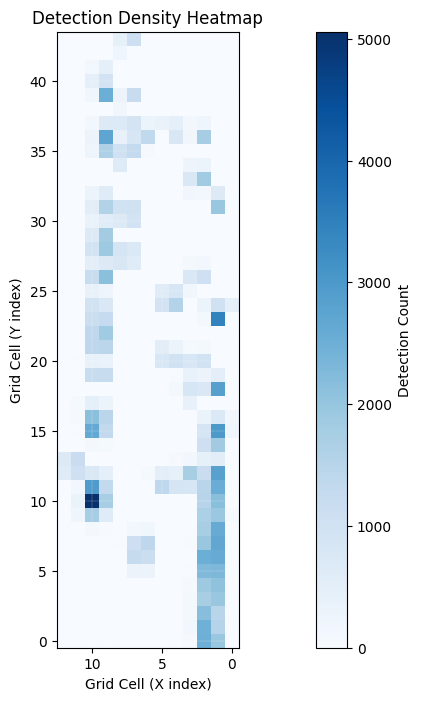

In [87]:
plt.figure(figsize=(20, 8))


plt.imshow(
    density_grid,
    cmap="Blues",
)

plt.colorbar(label="Detection Count")
plt.title("Detection Density Heatmap")

plt.xlabel("Grid Cell (X index)")
plt.ylabel("Grid Cell (Y index)")

# Optional: place grid lines for visual clarity
plt.grid(color='white', linestyle='--', linewidth=0.2)

# rotate grid so that it is easier to interpret
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.show()

In [88]:
print(density_grid)

[[   0 1940 2494   48    0    0    0    0    0    0    0    0    0]
 [   0 1507 2480  152    0    0    0    0    0    0    0    0    0]
 [   0 1481 2165  102    0    0    0    0    0    0    0    0    0]
 [   0 1961 1738   90    0    0    0    0    0    0    0    0    0]
 [   0 2063 1886   52    0    0    0    0    0    0    0    0    0]
 [   0 2310 2269   28    0    0  285  277    0    0    0    0    0]
 [   0 2584 2515   18    0    0 1138 1239    0    0    0    0    0]
 [   0 2684 1962   35    0    0 1402 1081   20    0    0    0    0]
 [   0 2576 1732   15    0    0  182  125    8   38   93    0    0]
 [  71 1935 1664    4    0    0    0    0    0  599 1762  219    0]
 [   0 2153 1482    0    0    0    0    0    0 1744 5058  324    0]
 [   0 2554 1466  796  843 1357    0    0    0 1308 2939  136    0]
 [   0 2822 1153 1734  417  497   64    0    0  448  729 1028  608]
 [   0  520  417  136   40    0    0    0    0    0    0 1149  641]
 [   0 1834 1068    0    0    0    0    0    0  